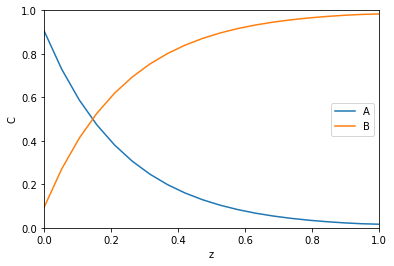

In [13]:
k = 10
y0_A = 1.0
y0_B = 0.0

def construct_convdiff_matrix(u, D, y0, points):
    A = construct_conv_matrix_central_diff(points)
    B = construct_diff_matrix_central_diff(points)
    matrix = -u*A/(2.*dx) + D*B/dx**2
    first_row = np.zeros(shape = (points + 2))
    last_row = np.zeros(shape = (points + 2))
    first_row[0] = 1
    first_row[1] = 2*dx*u/D
    first_row[2] = -1
    last_row[-3] = -1
    last_row[-1] = 1
    matrix = np.vstack((first_row, matrix, last_row))
    # vector on the right hand side of the equation
    rhs = np.zeros(shape = (points + 2))
    rhs[0] = 2*dx*u/D * y0
    return matrix, rhs

def construct_rates_matrix(k, points):
    rates = np.eye(points + 2) * k
    rates[0,0] = 0.0
    rates[-1,-1] = 0.0
    return rates

matrix_A, rhs_A = construct_convdiff_matrix(u, D, y0_A, points)
matrix_B, rhs_B = construct_convdiff_matrix(u, D, y0_B, points)
rates_A = construct_rates_matrix(k, points)
zeros = np.zeros(matrix_A.shape)
matrix_all = np.vstack((np.hstack((matrix_A - rates_A, zeros)), np.hstack((rates_A, matrix_B))))
rhs_all = np.hstack((rhs_A, rhs_B))
C_lin = solve(matrix_all, rhs_all)

C_fin_A = C_lin[1:points+1]
C_fin_B = C_lin[points+3:-1]

plot_profiles([C_fin_A, C_fin_B], points, ["A", "B"])